## Homework - Machine Learning Preparation
# DO NOT EDIT DIRECTLY, DOWNLOAD AND EDIT THE DOWNLOADED FILE


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.25.2
pandas version :  1.5.3
seaborn version :  0.13.1


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Describe Data

## Load Data

In [ ]:
df = pd.read_csv("Product_Exclusive_Classification.csv")
df.head()

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
0,50,SEPHORA COLLECTION,no category,5.0,46.0,0.0,50.0,50.0,0
1,304,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
2,404,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
3,443,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
4,463,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0


# 1. Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


In [ ]:
df.sample(5)

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
1980,1770528,Erno Laszlo,Face Masks,4.5,65.0,5400.0,108.0,108.0,0
7801,2282416,Algenist,Value & Gift Sets,4.5,2.0,780.0,112.0,137.0,1
1129,1574276,CHANEL,Bath & Shower,4.5,3.0,2200.0,55.0,55.0,0
3409,1964576,BECCA,Makeup,4.0,18.0,0.0,21.0,21.0,0
7992,2293157,VOLUSPA,Candles,3.0,7.0,1400.0,32.0,32.0,0


In [ ]:
cats = ['brand', 'category']
nums = ['id', 'rating', 'number_of_reviews', 'love', 'price', 'value_price', 'exclusive']

In [ ]:
df[cats].describe()

,brand,category
count,8000,7987
unique,310,142
top,SEPHORA COLLECTION,Perfume
freq,492,619


In [ ]:
df[nums].describe()

,id,rating,number_of_reviews,love,price,value_price,exclusive
count,8.000000e+03,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000,8000.000000
mean,1.910231e+06,4.085136,303.574396,1.756396e+04,49.900935,50.983300,0.255875
std,3.858353e+05,0.761069,931.724460,4.425339e+04,46.864764,48.473049,0.436379
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.000000,0.000000
25%,1.773379e+06,4.000000,14.000000,2.000000e+03,24.000000,24.000000,0.000000
50%,2.030360e+06,4.000000,56.000000,5.500000e+03,35.000000,35.000000,0.000000
75%,2.185074e+06,4.500000,231.500000,1.530000e+04,59.000000,60.000000,1.000000
max,2.293801e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.000000,1.000000


In [ ]:
df.isna().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom brand:
SEPHORA COLLECTION    492
CLINIQUE              211
TOM FORD              150
tarte                 143
Kiehl's Since 1851    122
                     ... 
Conture                 1
Cocofloss               1
Makeup Eraser           1
Flora + Bast            1
SHHHOWERCAP             1
Name: brand, Length: 310, dtype: int64

Value count kolom category:
Perfume                  619
Moisturizers             395
Face Serums              334
Value & Gift Sets        241
Face Wash & Cleansers    225
                        ... 
Powder Brush               1
Accessories                1
Lid Shadow Brush           1
Spa Tools                  1
Cleansing Brushes          1
Name: category, Length: 142, dtype: int64



In [ ]:
for col in nums:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom id:
1723881    2
1764950    2
2245199    2
2231504    2
455774     2
          ..
1873231    1
1873223    1
1873215    1
1873207    1
2293801    1
Name: id, Length: 7951, dtype: int64

Value count kolom rating:
4.5    3127
4.0    2628
3.5     968
5.0     650
3.0     268
0.0     140
2.5      76
2.0      26
1.0      15
1.5       7
Name: rating, dtype: int64

Value count kolom number_of_reviews:
1000.0    357
3.0       192
4.0       168
5.0       168
2.0       162
         ... 
952.0       1
379.0       1
995.0       1
900.0       1
987.0       1
Name: number_of_reviews, Length: 815, dtype: int64

Value count kolom love:
0.0         150
1500.0      113
1100.0      103
1800.0       98
2100.0       94
           ... 
35600.0       1
748.0         1
191700.0      1
61000.0       1
60.0          1
Name: love, Length: 1490, dtype: int64

Value count kolom price:
25.0     293
28.0     292
30.0     290
29.0     227
24.0     222
        ... 
239.0      1
185.0      1
178.0      

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai? <br> Ada, yaitu kolom id dengan tipe data int dan kolom exclusive dengan tipe data int. <br>

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja? <br> Ada, yaitu kolom category, rating, number_of_reviews, love, price, dan value_price. <br>

C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq) <br>
Ada, dikolom id dan exclusive yang sebaiknya menampilkan nilai count, unique, top, freq.

# 2. Univariate Analysis

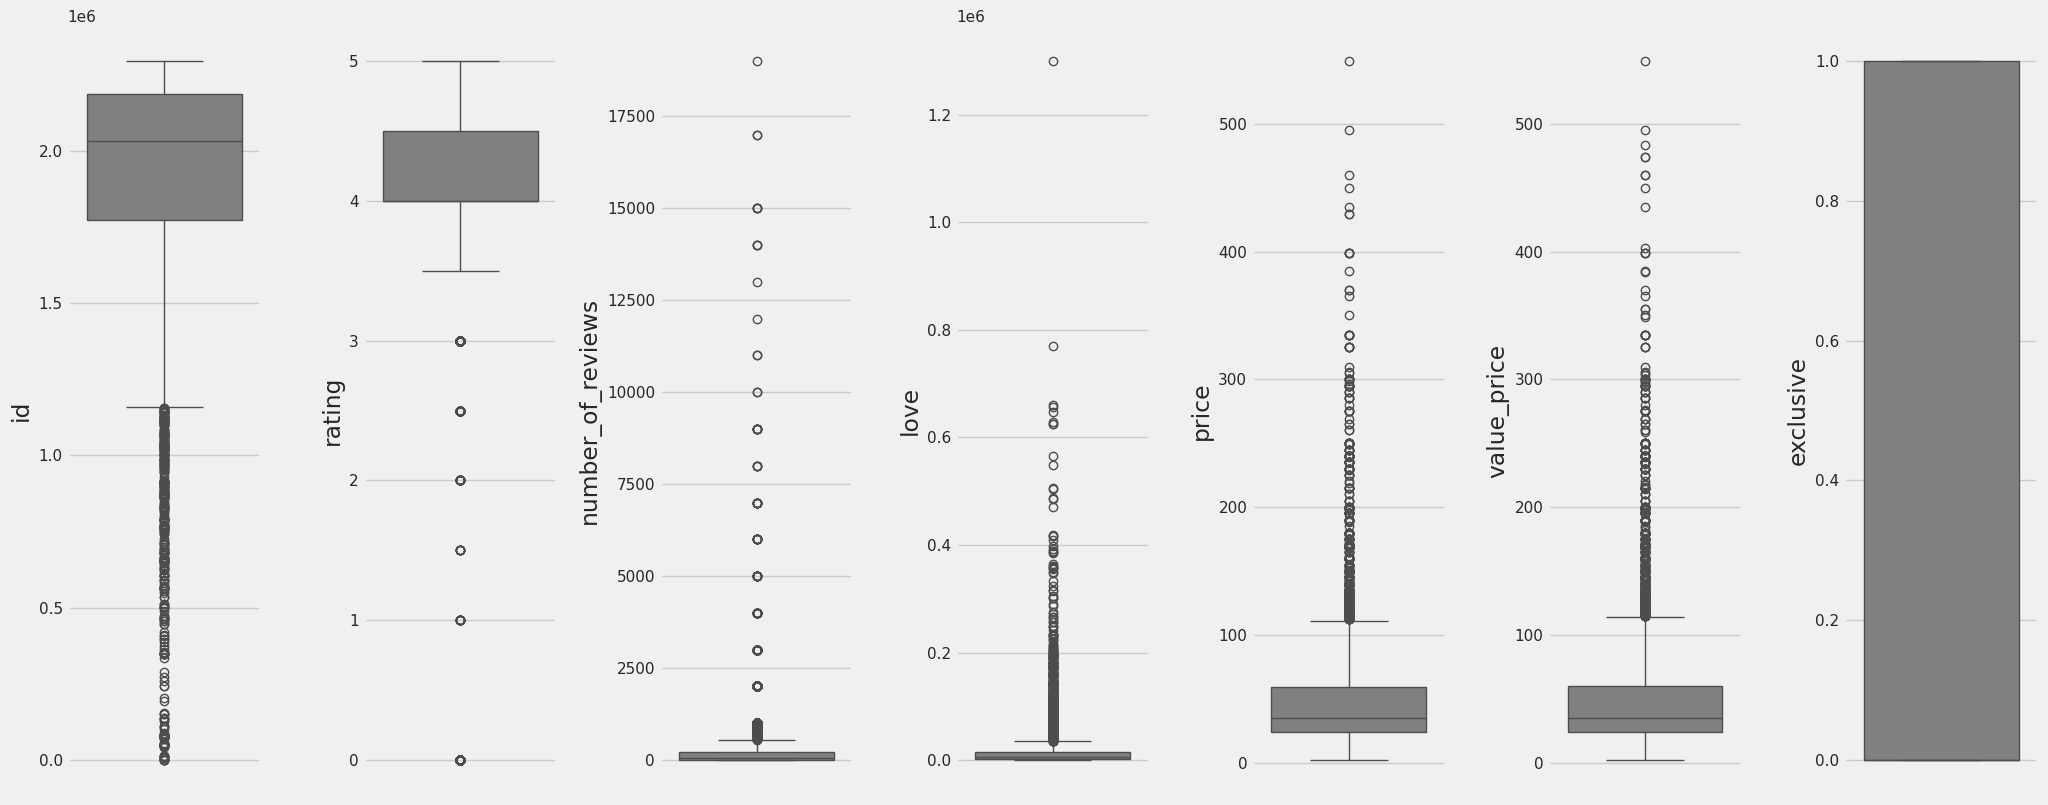

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

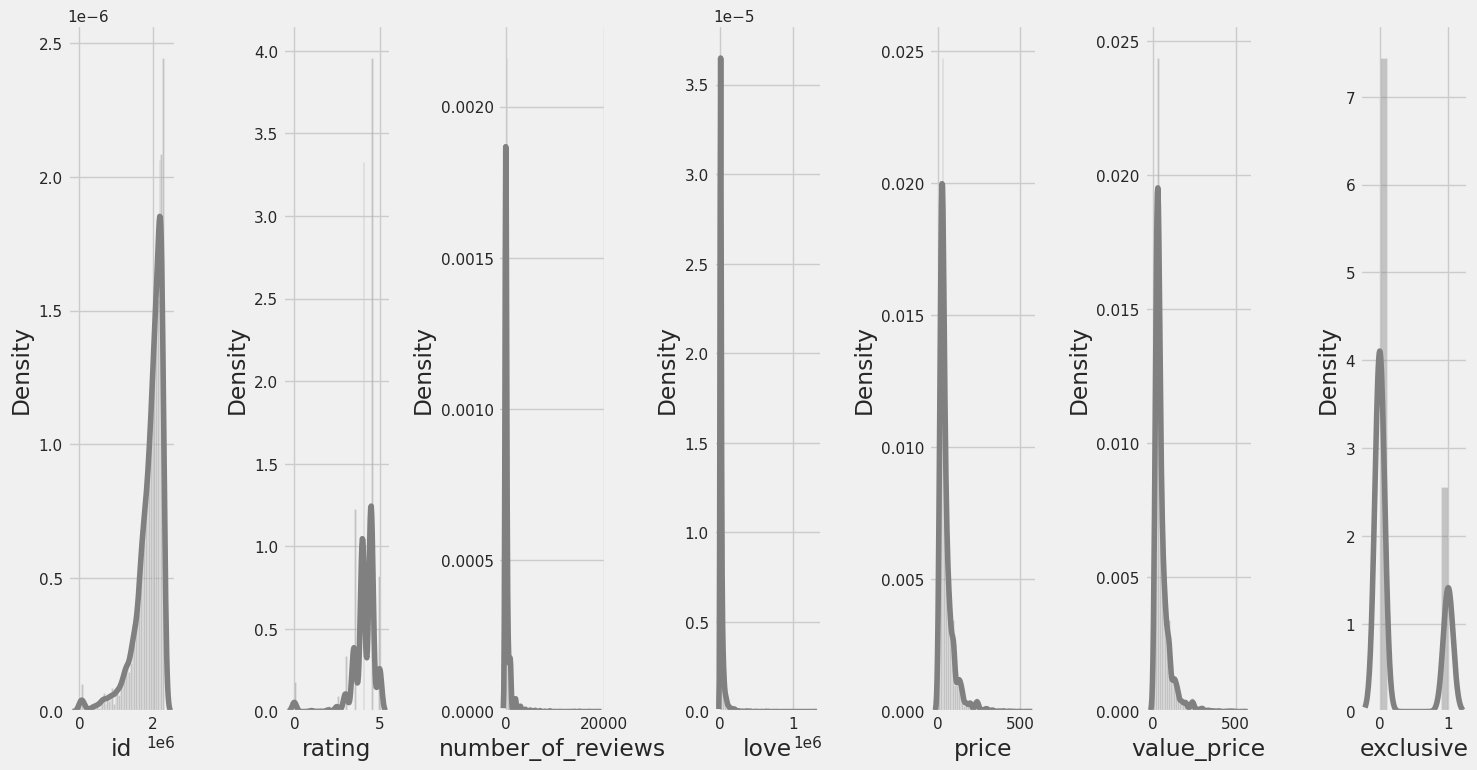

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums), i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

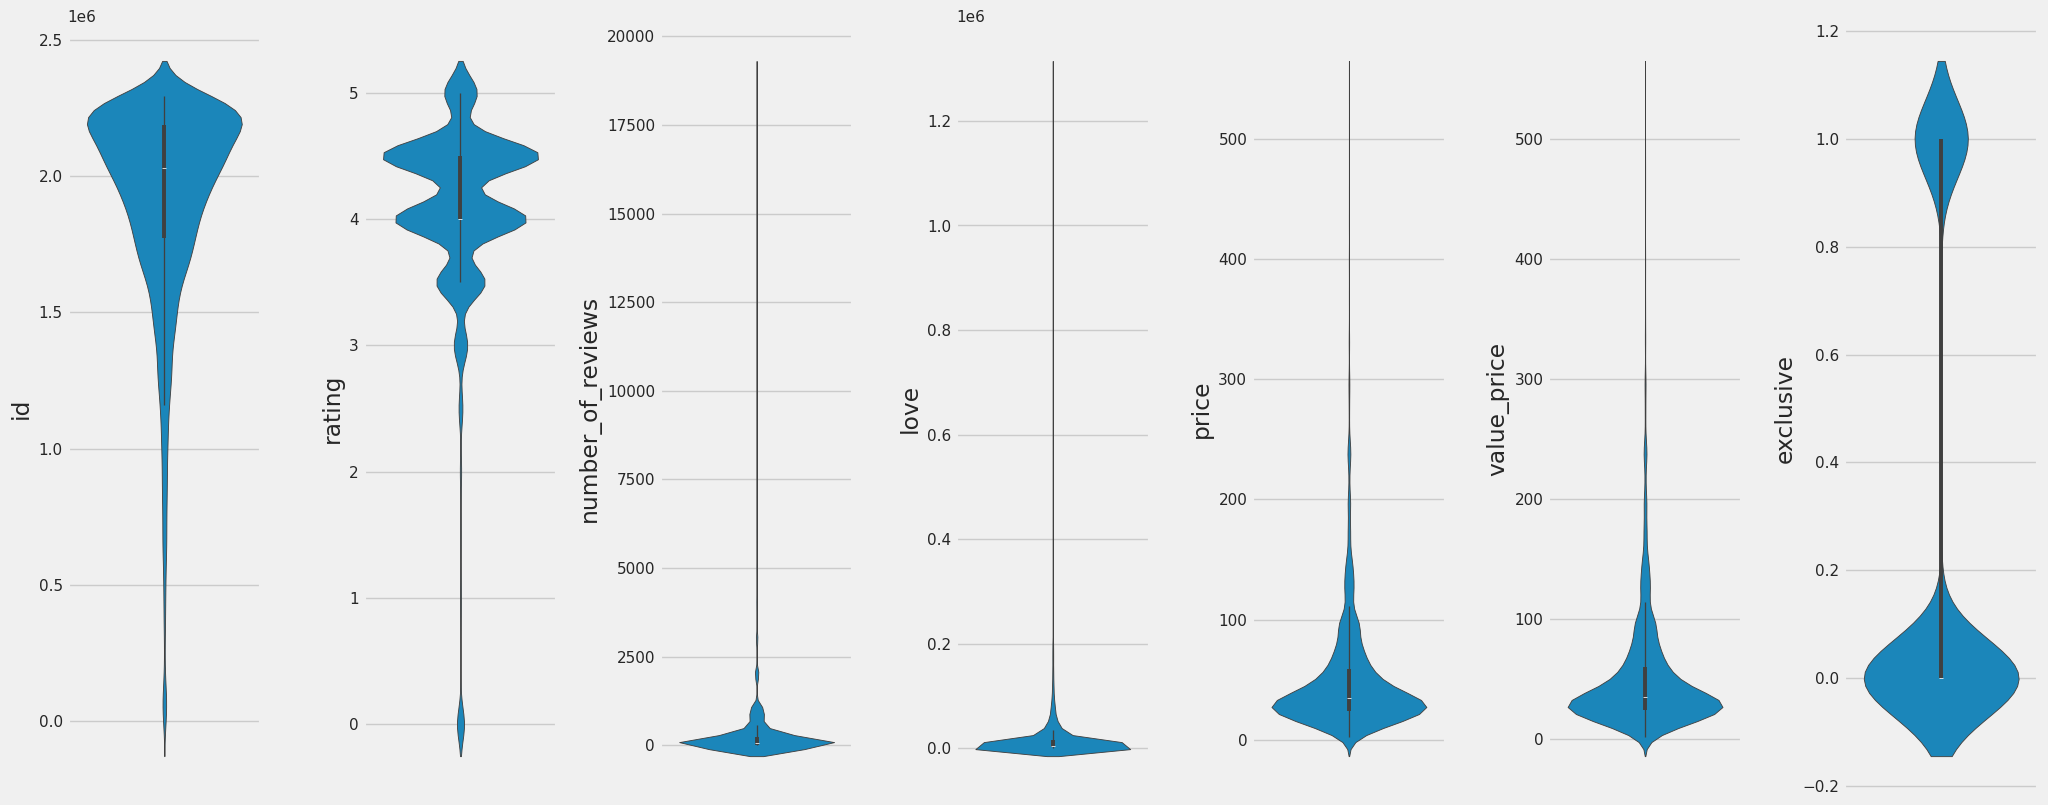

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

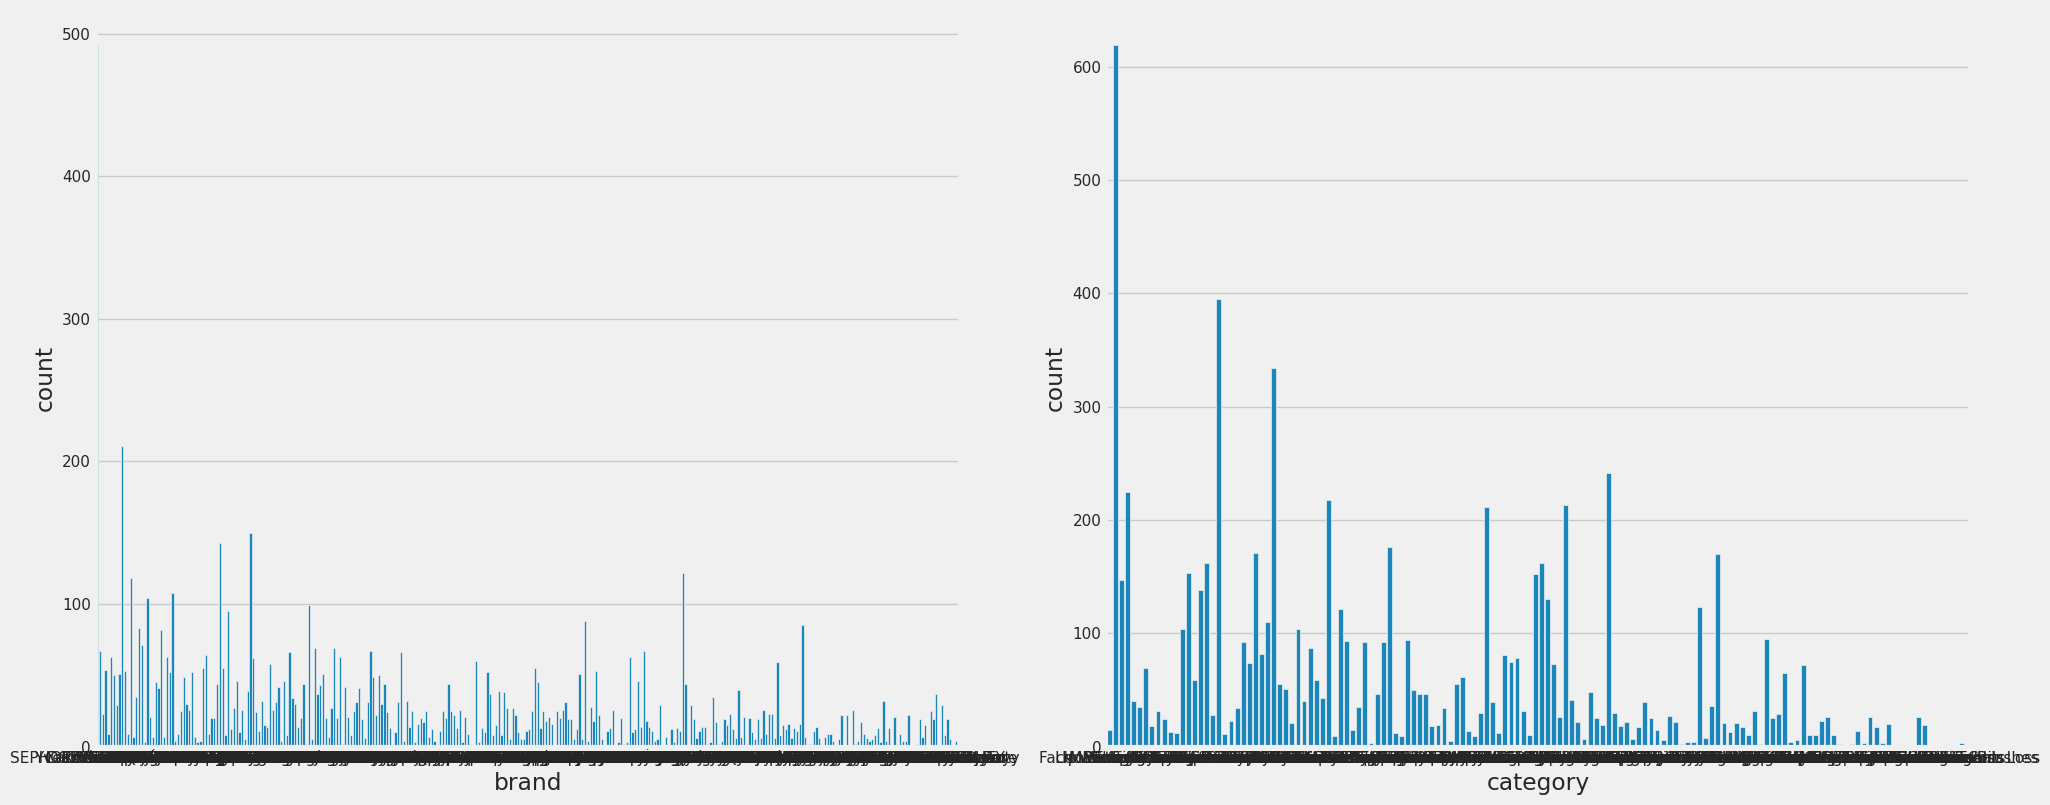

In [ ]:
for i in range(0, len(cats)):
  plt.subplot(1, len(cats), i+1)
  sns.countplot(x=df[cats[i]])
  plt.tight_layout()

*   Fitur id dan rating mengalami distribusi data dengan nilai skewed negatif. Sedangkan fitur number_of_reviews, love, price, dan value_price distribusi data dengan nilai skewed positif. Dan yang menarik ialah untuk fitur exclusive distribusi data bimodal.
*   Tiap fitur di kelompok data numerical ada outlier kecuali exclusive.
*   Pada fitur di kelompok data category memiliki category yang terlalu banyak.
*   Hal yang perlu di folllow up pada saat preprocessing data: <br> Mengubah fitur id dan exclusive menjadi categorical, mengubah data yang terdistribusi kekanan atau kekiri menjadi distribusi normal.





# 3. Multivariate Analysis

<Axes: >

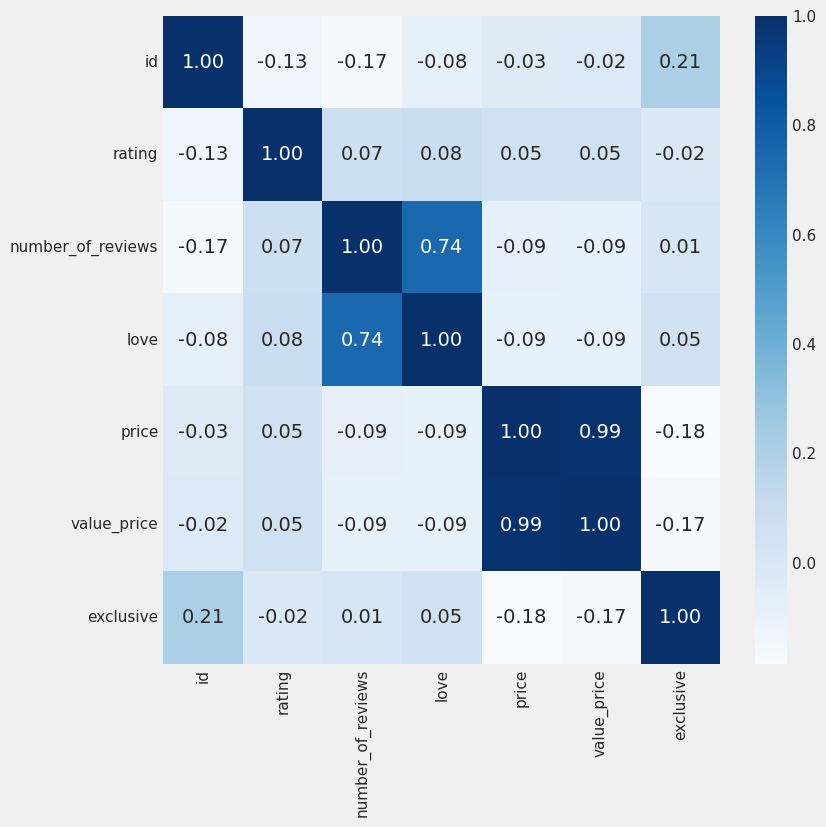

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 1500x1500 with 0 Axes>

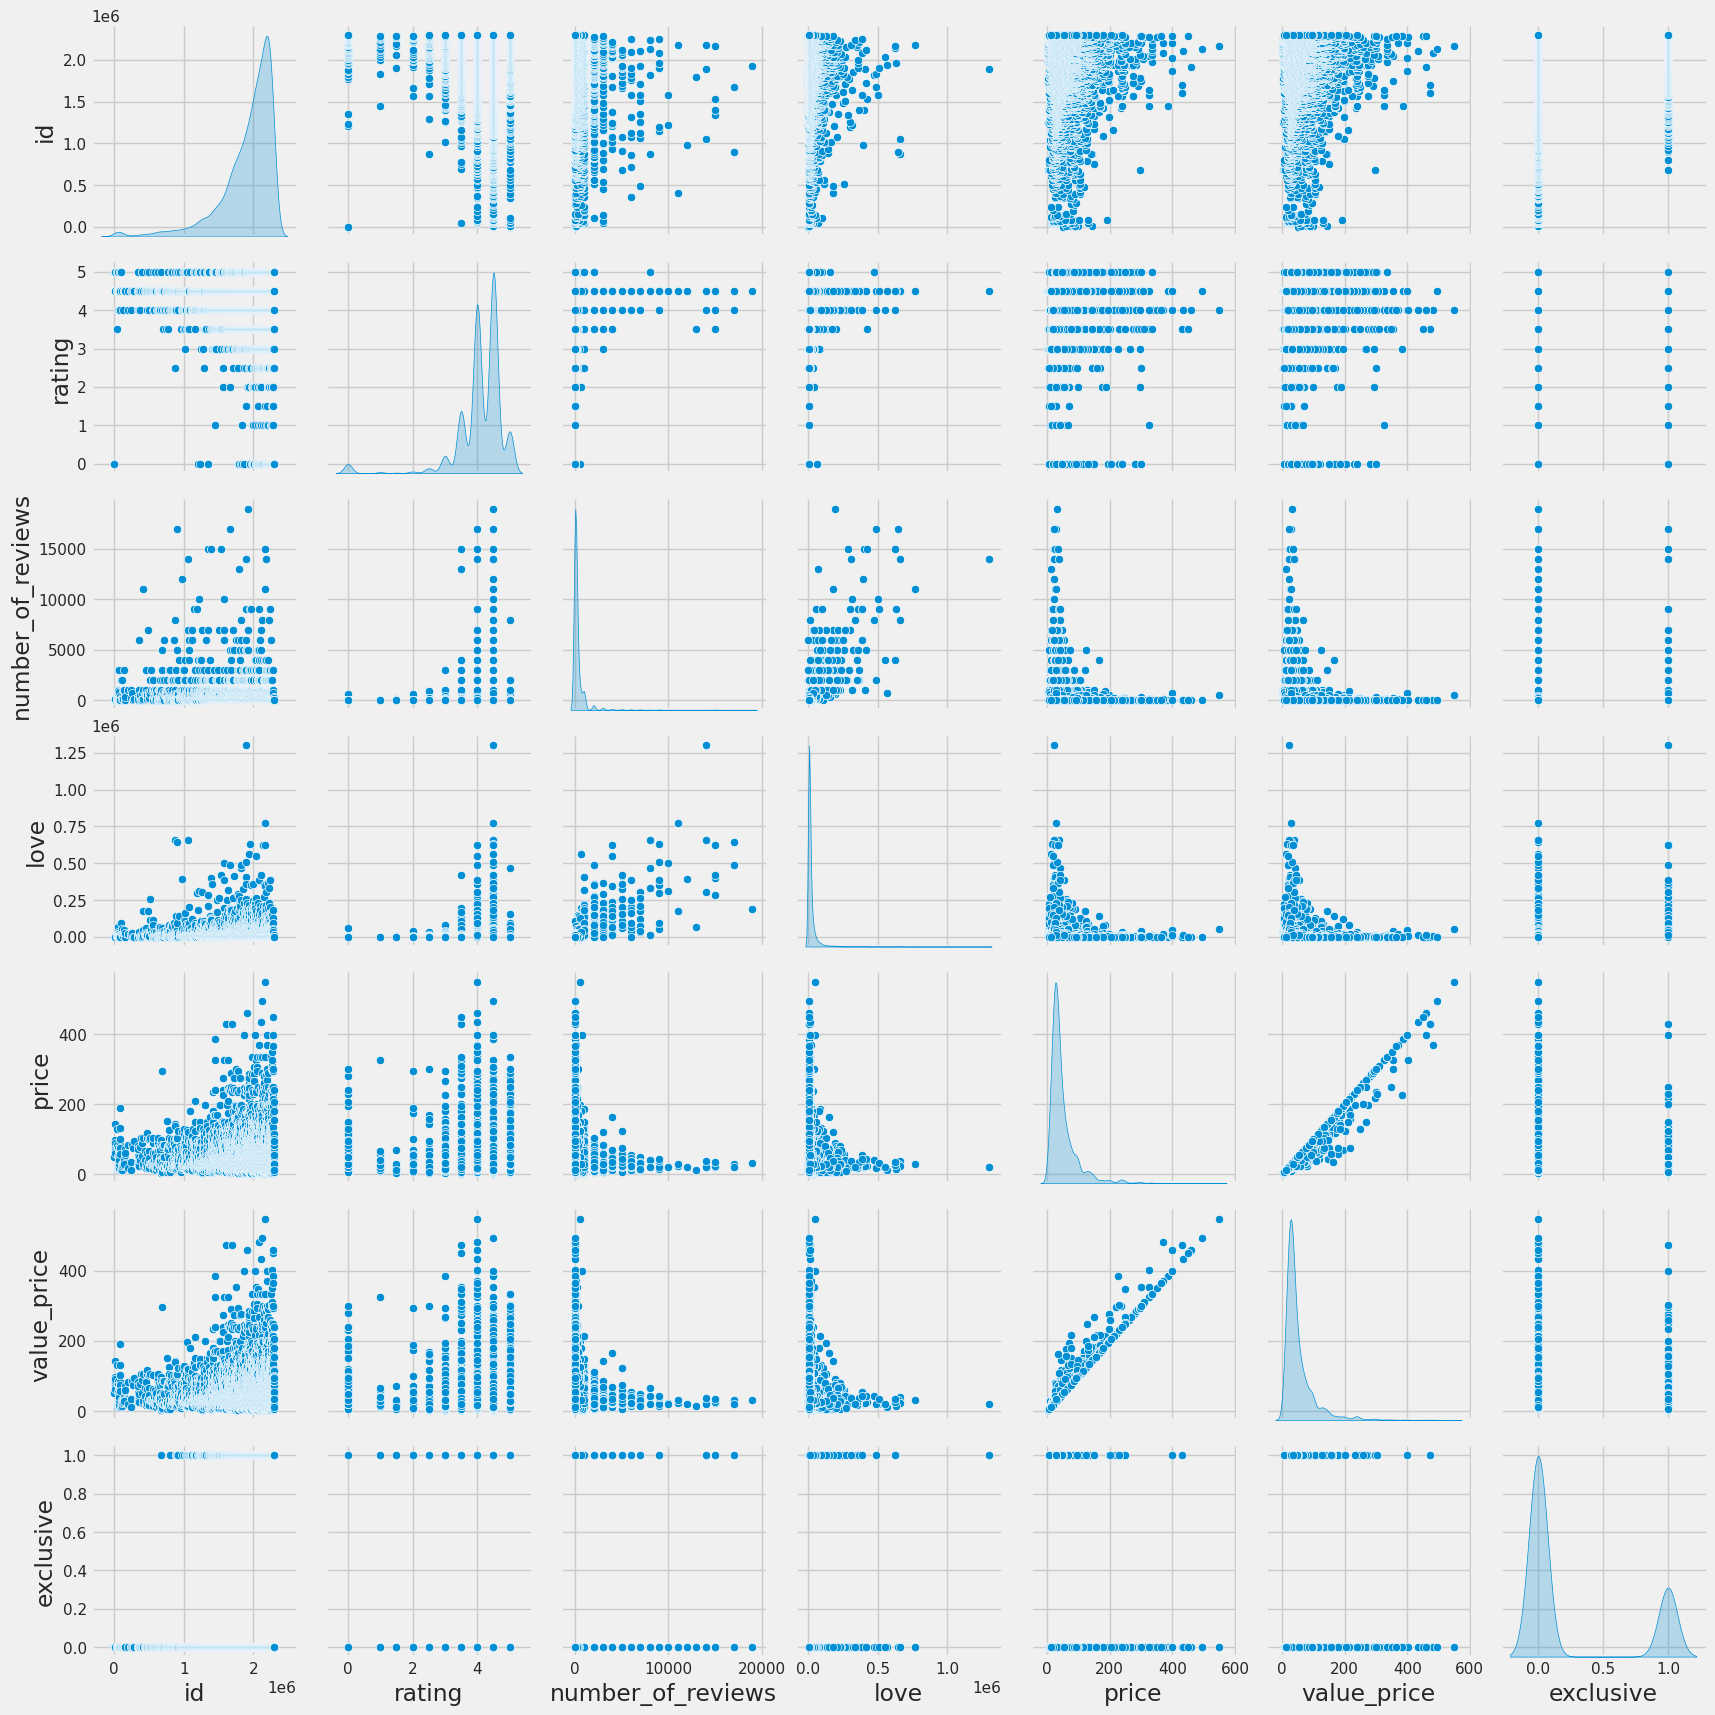

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

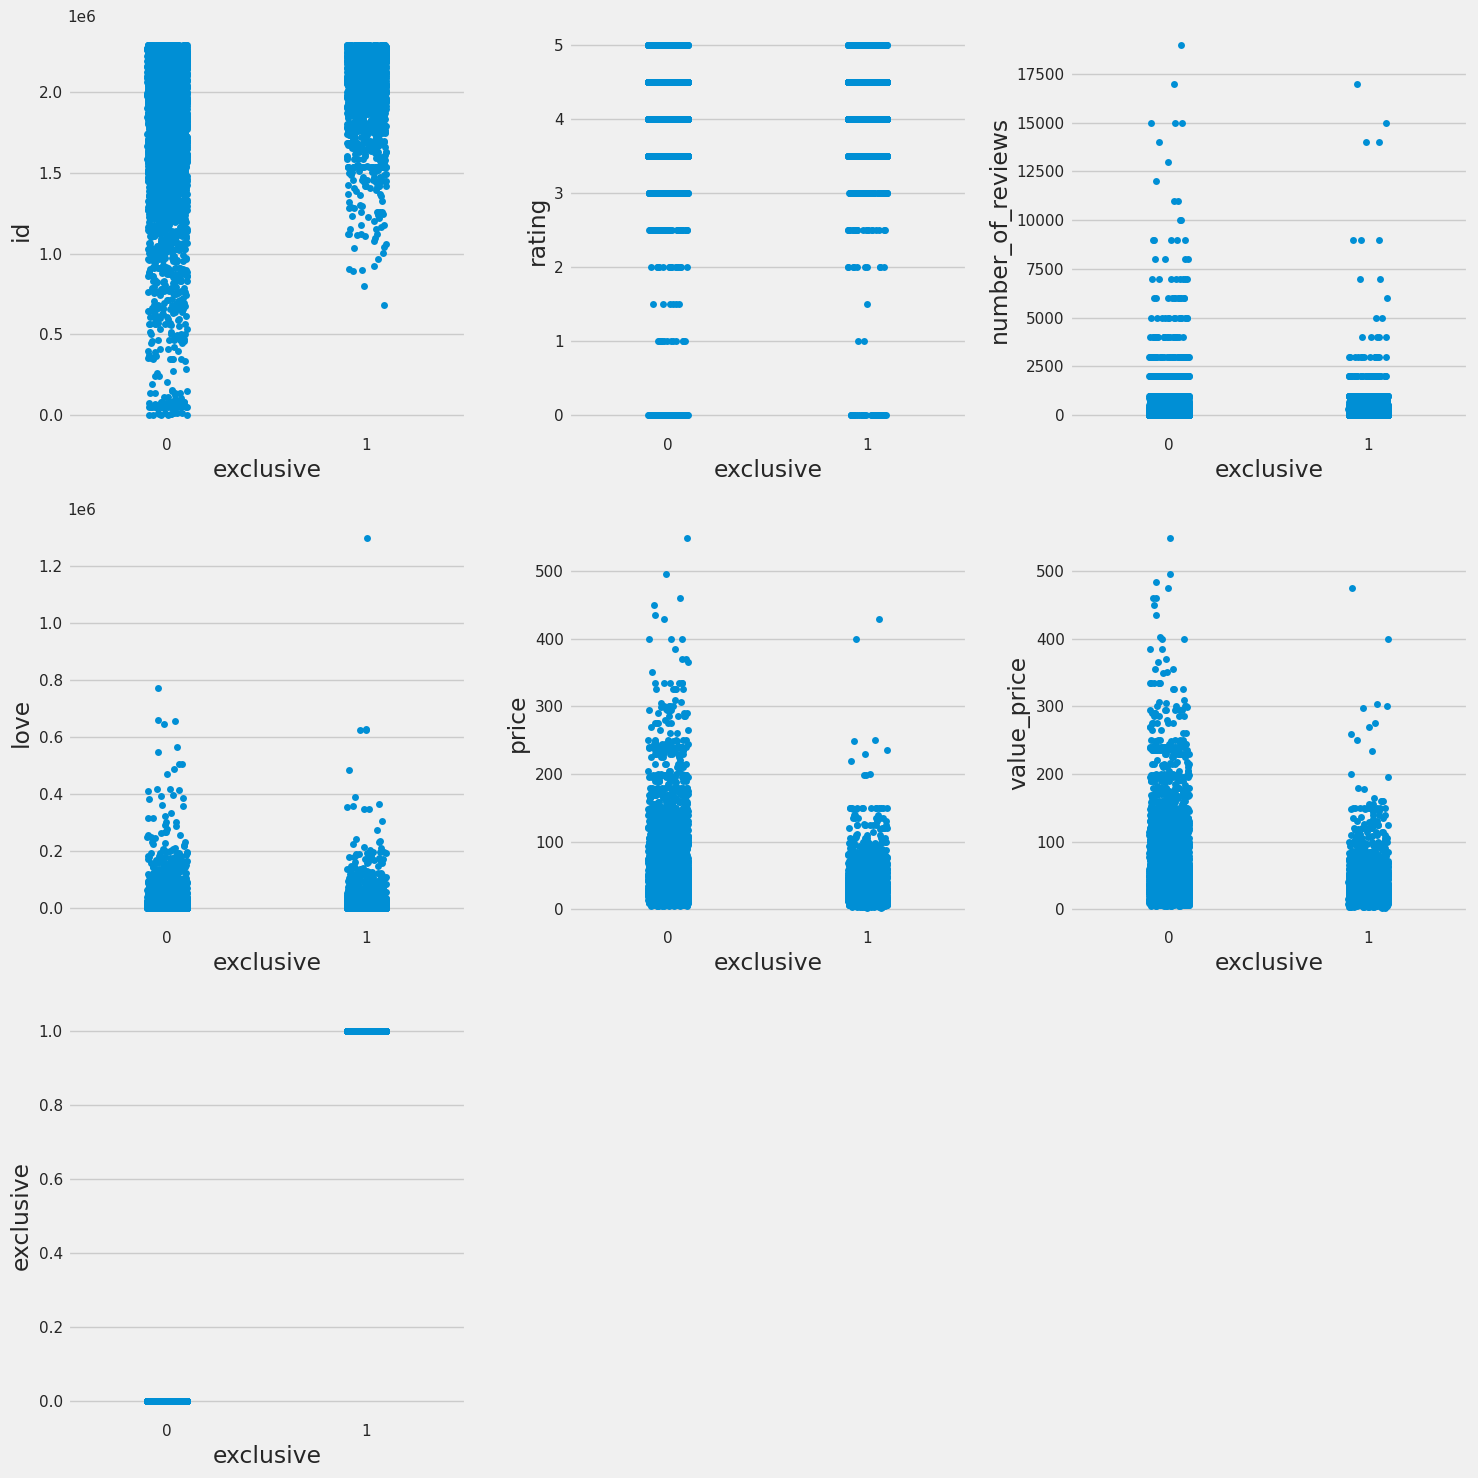

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='exclusive', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan? <br>
id, rating, exclusive, brand, dan category. <br>
<br>
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu? <br>
Ada, korelasi antara love dengan number_of_reviews dan price dengan value_price yang mana nilai korelasinya diatas 0.7 sehingga perlu di drop fiturnya karena kemungkinan fitur tersebut redundan.

# Data Preparation

## Missing Value (5 Poin)

In [ ]:
# Cek total keseluruhan data yang kosong pada setiap kolom

df.isna().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

Dari setiap kolom data yang kosong, tampaknya memiliki jumlah yang kurang dari 10% dari data keseluruhan (terbilang sedikit). Oleh karena itu dapat kita lakukan **penghapusan/drop** data, ataupun juga bisa diisi dengan nilai **modus/mean**. Tim kami memilih data kosong pada number_of_reviews, price dan value_price di drop, sedangkan sisanya disi dengan nilai modus/mean.

In [ ]:
df.dropna(inplace=True, subset=['number_of_reviews', 'price', 'value_price'])

In [ ]:
df['category'].fillna(df['category'].mode()[0], inplace=True)

Untuk data categorical pada kolom category, nilai kosong kita isi dengan nilai modus.

In [ ]:
target_cols = ['rating', 'love']
df[target_cols] = df[target_cols].fillna(df[target_cols].mean())

Untuk kolom **rating** dan **love**, kita isi dengan **rata-ratanya**.

## Duplicate Values (5 Poin)


In [ ]:
# cek duplikasi data dari semua row

df.duplicated().sum()

0

Tidak ada data yang **duplikat**

## Outliers (5 Poin)

Terlihat pada plot sebelumnya distribusi setiap kolom memiliki skew atau tidak memiliki distribusi yang normal, maka tim kami memilih **metode IQR** untuk digunakan pada handling outliers.

In [ ]:
columns_check = ['number_of_reviews', 'love', 'price', 'value_price']

for column in columns_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (1.5 * IQR)
    high_limit = Q3 + (1.5 * IQR)
    filtered_entries = ((df[column] >= low_limit) & (df[column] <= high_limit))
    df = df[filtered_entries]


## Normalization/Standardization (5 Poin)


In [ ]:
from sklearn.preprocessing import StandardScaler

fitur_scale = ['rating','number_of_reviews','love','price','value_price']
scale = StandardScaler()

for fitur in fitur_scale :
  new_fitur = fitur + '_std'
  df[new_fitur] = scale.fit_transform(df[[fitur]].values.reshape(len(df), 1))[:, 0]

Menghilangkan fitur yang tidak diperlukan

In [ ]:
df = df.drop(fitur_scale, axis=1)

df.head()

,id,brand,category,exclusive,rating_std,number_of_reviews_std,love_std,price_std,value_price_std
0,50,SEPHORA COLLECTION,no category,0,1.171456,-0.308144,-1.04883,0.488827,0.456272
1,304,SEPHORA COLLECTION,no category,0,-4.907017,-0.734572,-1.04883,0.488827,0.456272
2,404,SEPHORA COLLECTION,no category,0,-4.907017,-0.734572,-1.04883,0.488827,0.456272
3,443,SEPHORA COLLECTION,no category,0,-4.907017,-0.734572,-1.04883,0.488827,0.456272
4,463,SEPHORA COLLECTION,no category,0,-4.907017,-0.734572,-1.04883,0.488827,0.456272


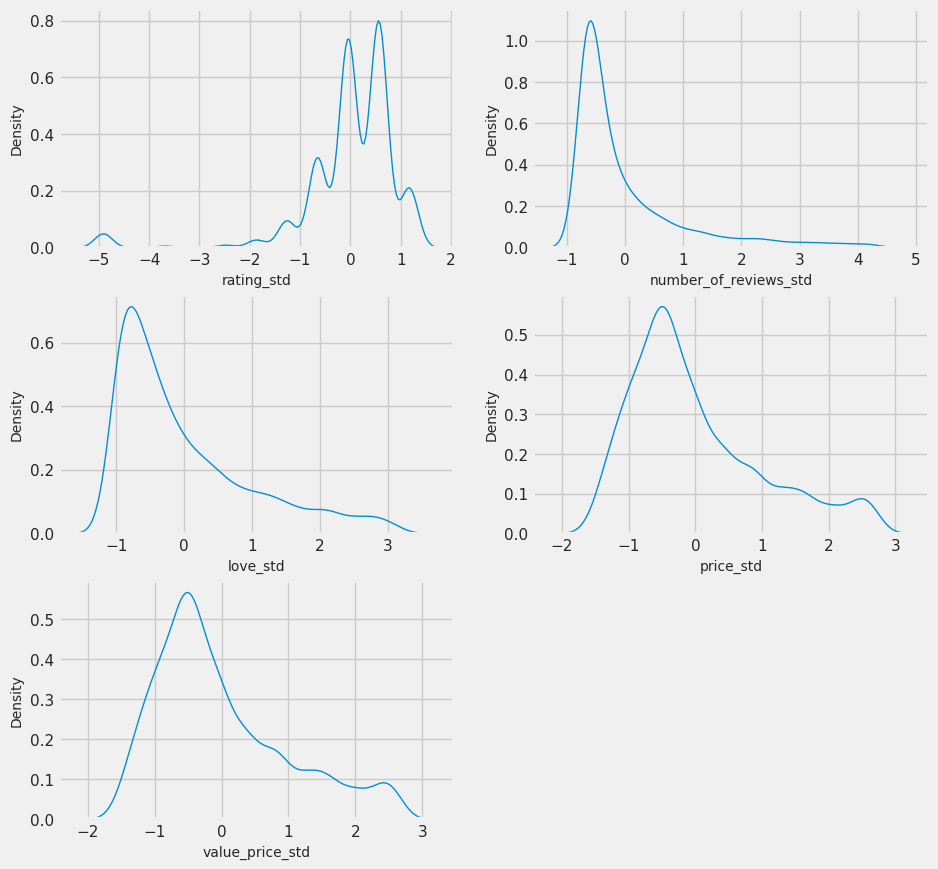

In [ ]:
plt.figure(figsize=(10,10))

for i in range(len(fitur_scale)):
  plt.subplot(3,2,i+1)
  sns.kdeplot(df[fitur_scale[i]+'_std'], linewidth=1)
  plt.xlabel(fitur_scale[i]+'_std', fontsize=10)
  plt.ylabel('Density', fontsize=10)

## Feature encoding (5 Poin)

In [ ]:
df['brand'] = df['brand'].astype('category')
df['category'] = df['category'].astype('category')

In [ ]:
for col in ['brand', 'category']:
  onehots = pd.get_dummies(df[col], prefix=col)
  df = df.join(onehots)

In [ ]:
df_new = df.drop(columns=['brand', 'category']).copy()

In [ ]:
df_new

,id,exclusive,rating_std,number_of_reviews_std,love_std,price_std,value_price_std,brand_8Greens,brand_AERIN,brand_ALTERNA Haircare,...,category_Skincare Sets,category_Spa Tools,category_Sponges & Applicators,category_Sunscreen,category_Teeth Whitening,category_Tinted Moisturizer,category_Toners,category_Tweezers & Eyebrow Tools,category_Value & Gift Sets,category_no category
0,50,0,1.171456,-0.308144,-1.048830,0.488827,0.456272,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,304,0,-4.907017,-0.734572,-1.048830,0.488827,0.456272,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,404,0,-4.907017,-0.734572,-1.048830,0.488827,0.456272,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,443,0,-4.907017,-0.734572,-1.048830,0.488827,0.456272,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,463,0,-4.907017,-0.734572,-1.048830,0.488827,0.456272,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2293207,0,-4.907017,-0.734572,-1.014261,2.033267,1.978835,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7996,2293439,0,-0.044239,-0.456467,1.160718,0.709461,0.673781,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7997,2293488,1,0.563609,-0.530628,1.249812,-0.437837,-0.239756,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7998,2293793,0,0.563609,-0.688221,-0.621175,-1.187993,-1.196796,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Class imbalance (5 Poin)

In [ ]:
df_new['exclusive'].value_counts()

0    4165
1    1464
Name: exclusive, dtype: int64

Pada jumlah count diatas, terdapat rentang yang cukup jauh berbeda antara exclusive 0 dengan 1, oleh karena itu tim kami melakukan resampling dengan metode **SMOTE over-sampling**

In [ ]:
from imblearn import under_sampling, over_sampling

In [ ]:
X = df_new.drop('exclusive', axis=1)
y = df_new['exclusive']

smote = over_sampling.SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
df_smote = pd.concat([X_smote, y_smote], axis=1)

In [ ]:
df_smote['exclusive'].value_counts()

0    4165
1    4165
Name: exclusive, dtype: int64

In [ ]:
df_smote.head()

,id,rating_std,number_of_reviews_std,love_std,price_std,value_price_std,brand_8Greens,brand_AERIN,brand_ALTERNA Haircare,brand_AMOREPACIFIC,...,category_Spa Tools,category_Sponges & Applicators,category_Sunscreen,category_Teeth Whitening,category_Tinted Moisturizer,category_Toners,category_Tweezers & Eyebrow Tools,category_Value & Gift Sets,category_no category,exclusive
0,50,1.171456,-0.308144,-1.04883,0.488827,0.456272,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,304,-4.907017,-0.734572,-1.04883,0.488827,0.456272,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,404,-4.907017,-0.734572,-1.04883,0.488827,0.456272,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,443,-4.907017,-0.734572,-1.04883,0.488827,0.456272,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,463,-4.907017,-0.734572,-1.04883,0.488827,0.456272,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Conclusion (10 Poin)

Menurutmu, mana saja 3 pre-processing yang paling memberikan impact?

Menurut tim kami, 3 pre-processing dibawah ini yang paling memberikan impact:

1. **Handle Outliers** (IQR Method): Mengidentifikasi dan menghapus outlier dapat memperbaiki distribusi data dan juga meningkatkan kualitas model.
2. **Feature Transformation** (Log Transformation): Melakukan transformasi log pada data yang tidak terdistribusi normal dapat memperbaiki skewness dan membuat model menjadi lebih baik.
3. **Handle Class Imbalance** (Resampling): Menangani ketidakseimbangan kelas dapat mencegah model menjadi biased terhadap kelas mayoritas dan meningkatkan performa pada kelas minoritas.

#NO 5

###A. Feature selection (membuang feature yang kurang relevan atau redundan)

Ternyata saat dibuat plot heatmap, fitur **love** berkorelasi kuat dengan **number_of_reviews** dan **value_price** kuat dengan **price**. Tim kami memutuskan untuk membuang fitur **love** & **value_price**.

In [ ]:
df_smote = df_smote.drop(['love_std', 'value_price_std'], axis=1)

In [ ]:
df_smote.head()

,id,rating_std,number_of_reviews_std,price_std,brand_8Greens,brand_AERIN,brand_ALTERNA Haircare,brand_AMOREPACIFIC,brand_Acqua Di Parma,brand_Aether Beauty,...,category_Spa Tools,category_Sponges & Applicators,category_Sunscreen,category_Teeth Whitening,category_Tinted Moisturizer,category_Toners,category_Tweezers & Eyebrow Tools,category_Value & Gift Sets,category_no category,exclusive
0,50,1.171456,-0.308144,0.488827,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,304,-4.907017,-0.734572,0.488827,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,404,-4.907017,-0.734572,0.488827,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,443,-4.907017,-0.734572,0.488827,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,463,-4.907017,-0.734572,0.488827,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


###B. Feature extraction (membuat feature baru dari feature yang sudah ada)

Fitur yang dapat diekstraksikan dari fitur yang ada misalnya fitur ratio dari **number_of_reviews** dengan **rating**.

In [ ]:
df_smote['reviews_rating_ratio_std'] = df_smote['number_of_reviews_std'] / df_smote['rating_std']

In [ ]:
df_smote.head()

,id,rating_std,number_of_reviews_std,price_std,brand_8Greens,brand_AERIN,brand_ALTERNA Haircare,brand_AMOREPACIFIC,brand_Acqua Di Parma,brand_Aether Beauty,...,category_Sponges & Applicators,category_Sunscreen,category_Teeth Whitening,category_Tinted Moisturizer,category_Toners,category_Tweezers & Eyebrow Tools,category_Value & Gift Sets,category_no category,exclusive,reviews_rating_ratio_std
0,50,1.171456,-0.308144,0.488827,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,-0.263043
1,304,-4.907017,-0.734572,0.488827,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.149698
2,404,-4.907017,-0.734572,0.488827,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.149698
3,443,-4.907017,-0.734572,0.488827,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.149698
4,463,-4.907017,-0.734572,0.488827,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.149698


###C. 4 minimal fitur tambahan (diluar fitur dataset)

1. Fitur Age of Product
2. Fitur Waktu (Hari, Bulan atau Tahun)
3. Fitur Diskon dari Price
4. Fitur Ketersediaan Produk di toko Online atau Tidak
5. Fitur jumlah produk terjual
6. Fitur keanggotaan
7. Fitur rating layanan pelanggan
8. Fitur ketersediaan produk kustom
9. Fitur asal produk
10. Fitur tanggal peluncuran